In [3]:
#knitr::opts_chunk$set(echo = TRUE)
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


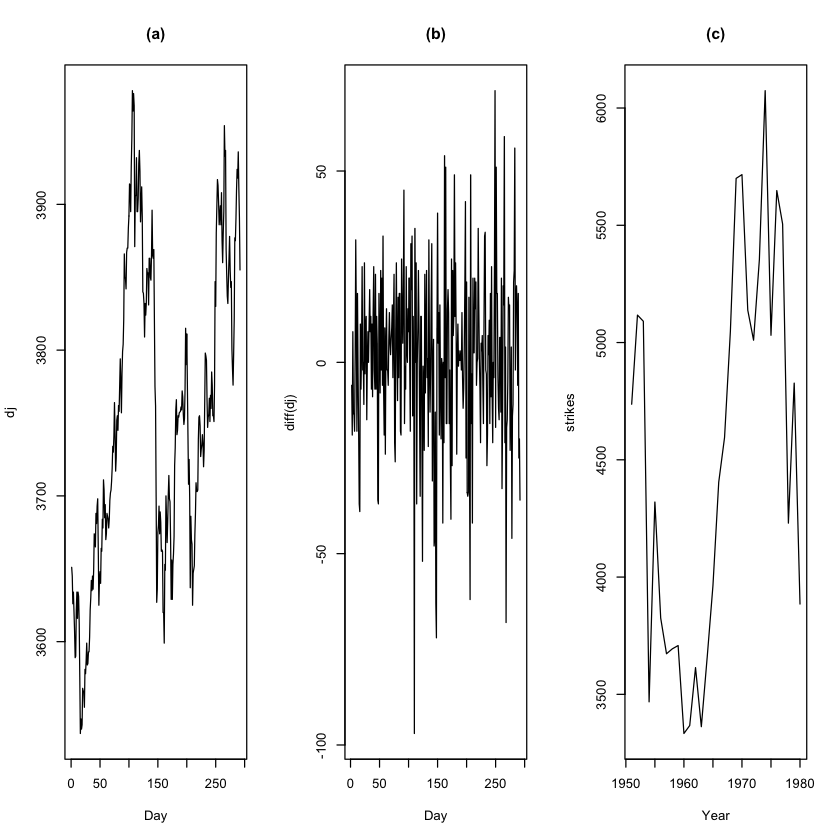

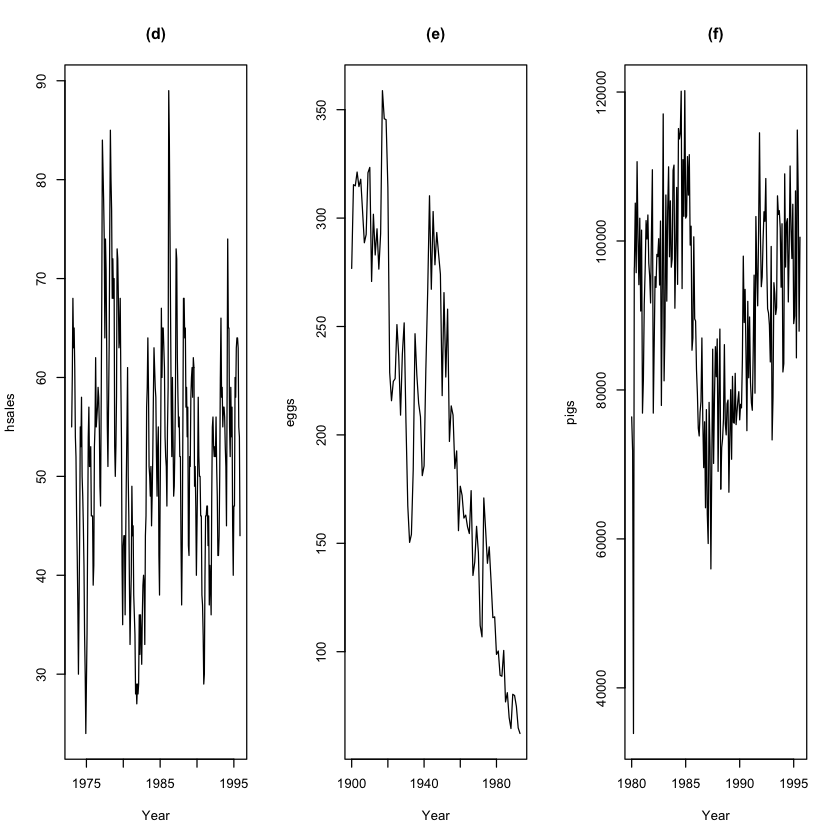

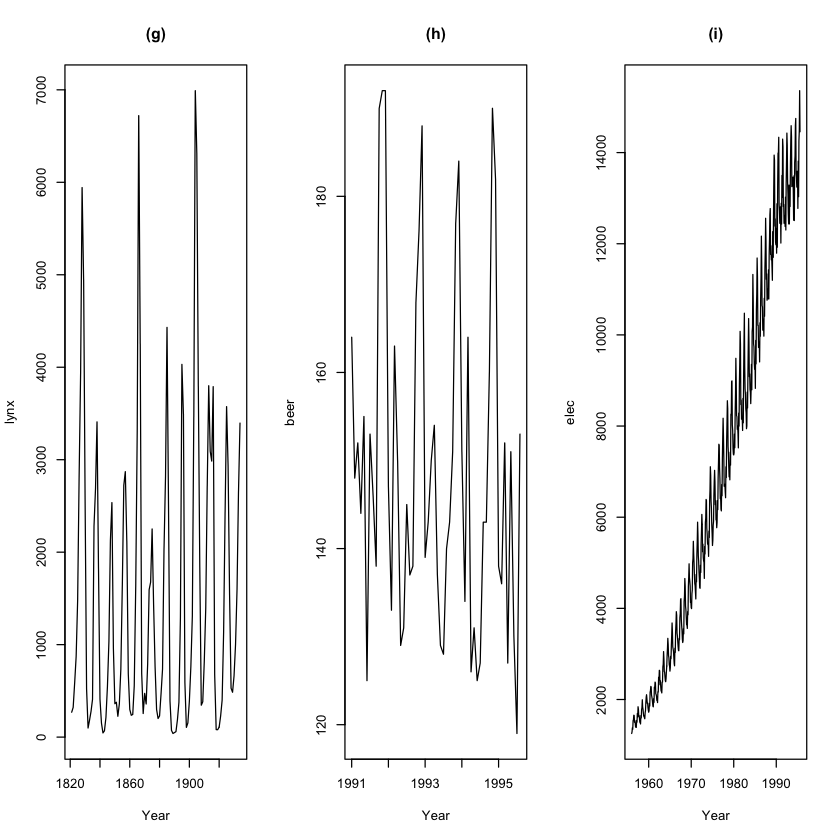


	Box-Ljung test

data:  diff(dj)
X-squared = 14.461, df = 10, p-value = 0.153


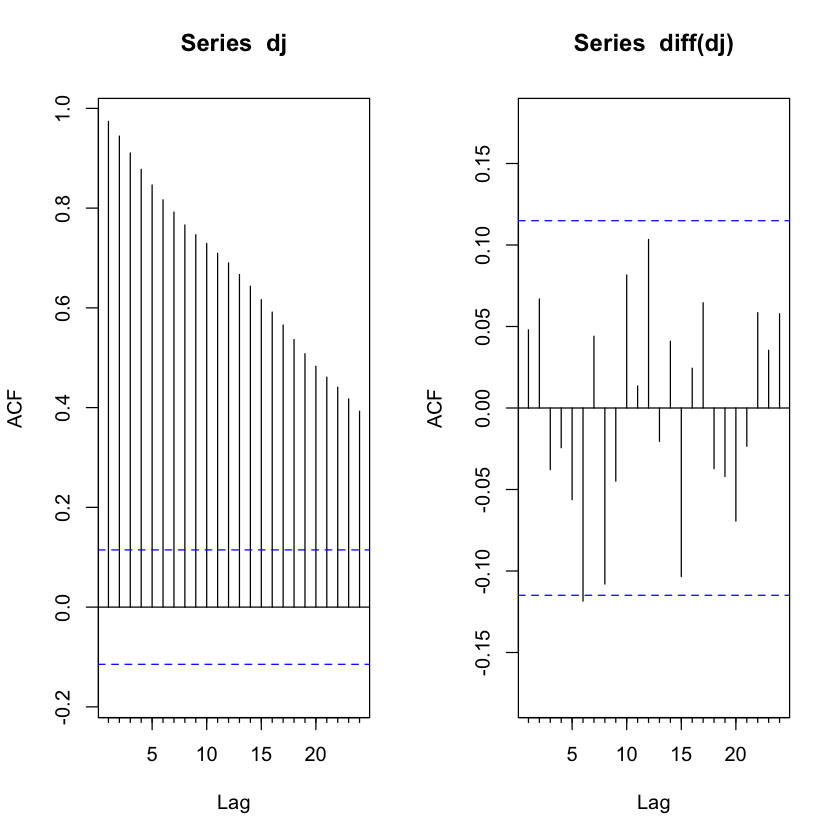

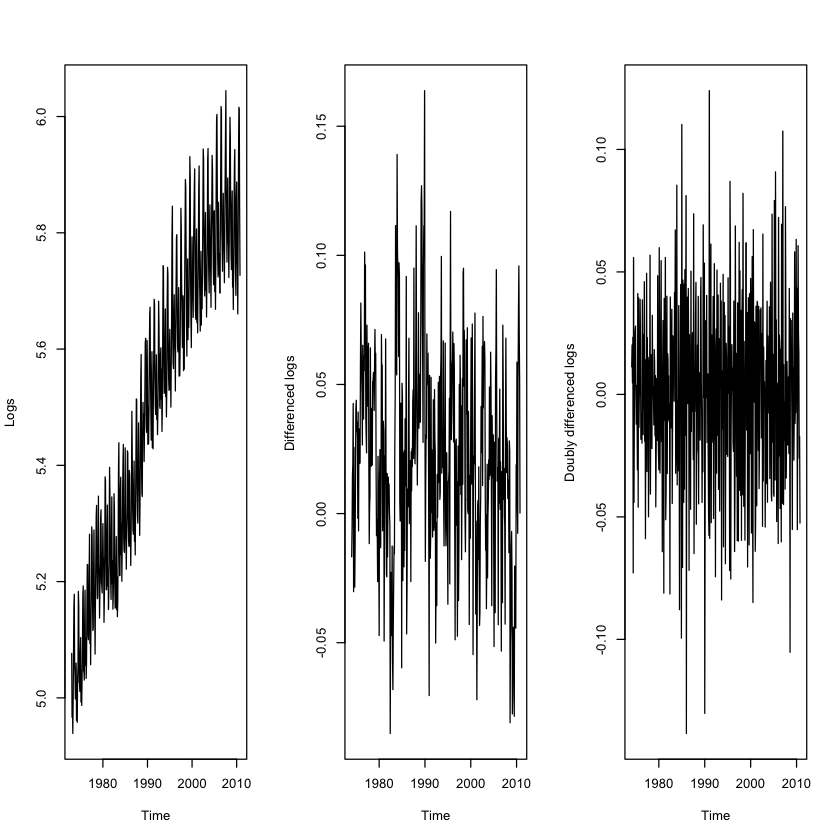

In [4]:
par(mfrow = c(1, 3))
plot(dj, main = "(a)", xlab = "Day")
plot(diff(dj), main = "(b)", xlab = "Day")
plot(strikes, main = "(c)", xlab = "Year")
plot(hsales, main = "(d)", xlab = "Year")
plot(eggs, main = "(e)", xlab = "Year")
plot(pigs, main = "(f)", xlab = "Year")
plot(lynx, main = "(g)", xlab = "Year")
plot(beer, main = "(h)", xlab = "Year")
plot(elec, main = "(i)", xlab = "Year")

par(mfrow = c(1, 2))
Acf(dj)
Acf(diff(dj))

Box.test(diff(dj), type = "L", lag = 10)

par(mfrow = c(1, 3))
plot(log(usmelec), ylab="Logs")
plot(diff(log(usmelec),12), ylab="
     Differenced logs")
plot(diff(diff(log(usmelec),12),1), ylab="Doubly differenced logs")


par(mfrow=c(1,1))



Creating AR(1) and AR(2) charts


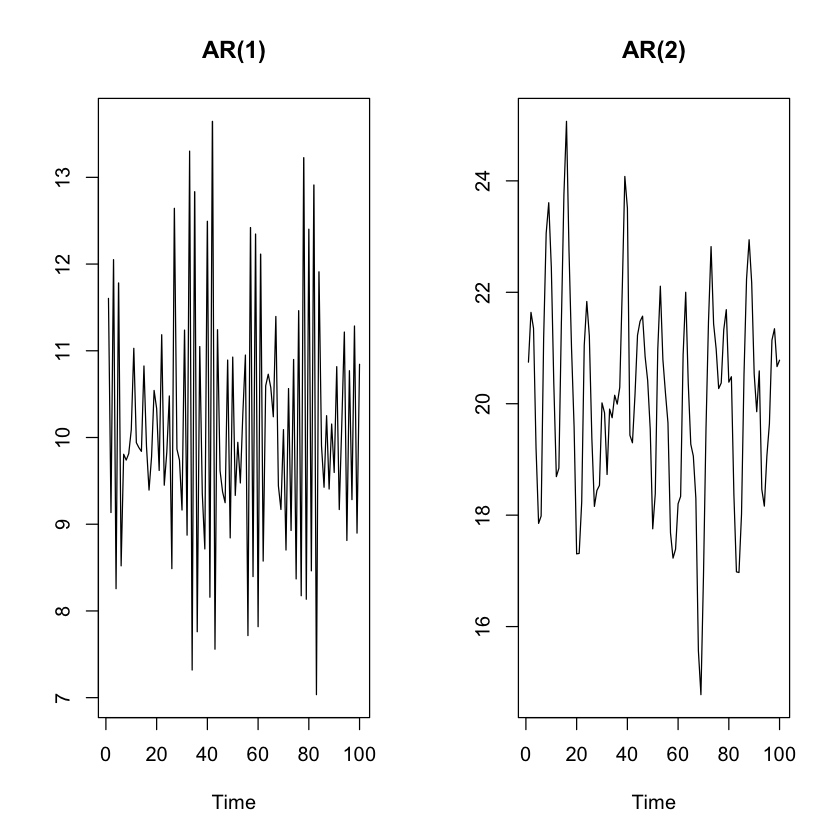

In [5]:
set.seed(1)
par(mfrow = c(1, 2))

testAR1 <- 10 + arima.sim(list(ar = -0.8), n= 100)
plot(testAR1, ylab = "", main = "AR(1)")

testAR2 <- 20 + arima.sim(list(ar = c(1.3, -0.7)), n = 100)
plot(testAR2, ylab = "", main = "AR(2)")



Creating MA(1) and MA(2) charts


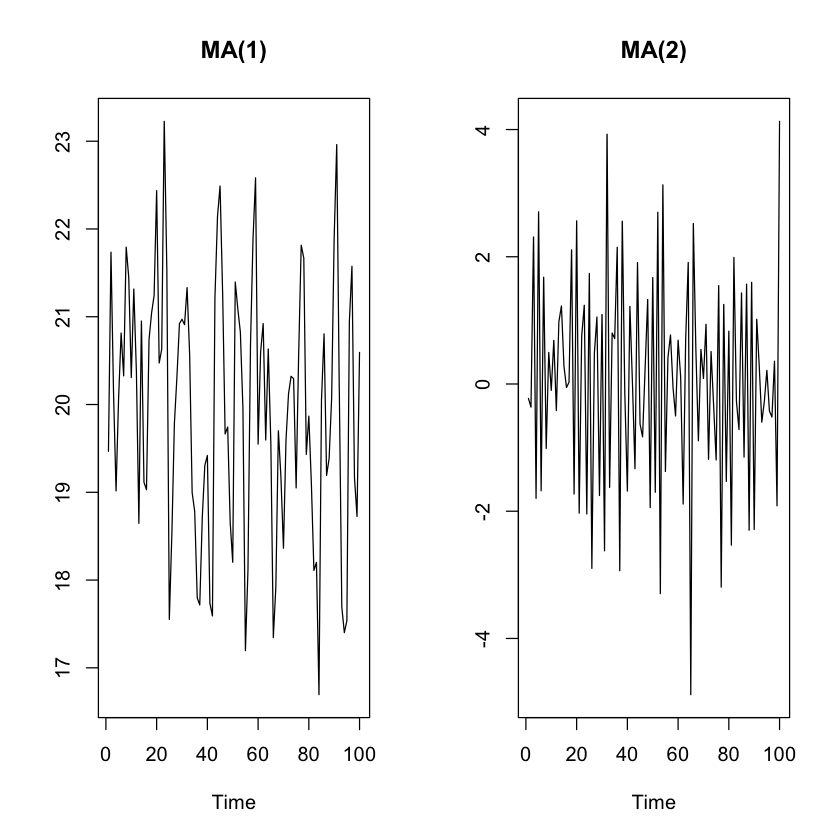

In [6]:
set.seed(2)
par(mfrow = c(1, 2))
testMA1 <- 20 + arima.sim(list(ma = 0.8), n = 100)
plot(testMA1, ylab = "", main = "MA(1)")

testMA2 <- arima.sim(list(ma = c(-1, +0.8)), n = 100)
plot(testMA2, ylab = "", main = "MA(2)")



Code for MA smoothing:


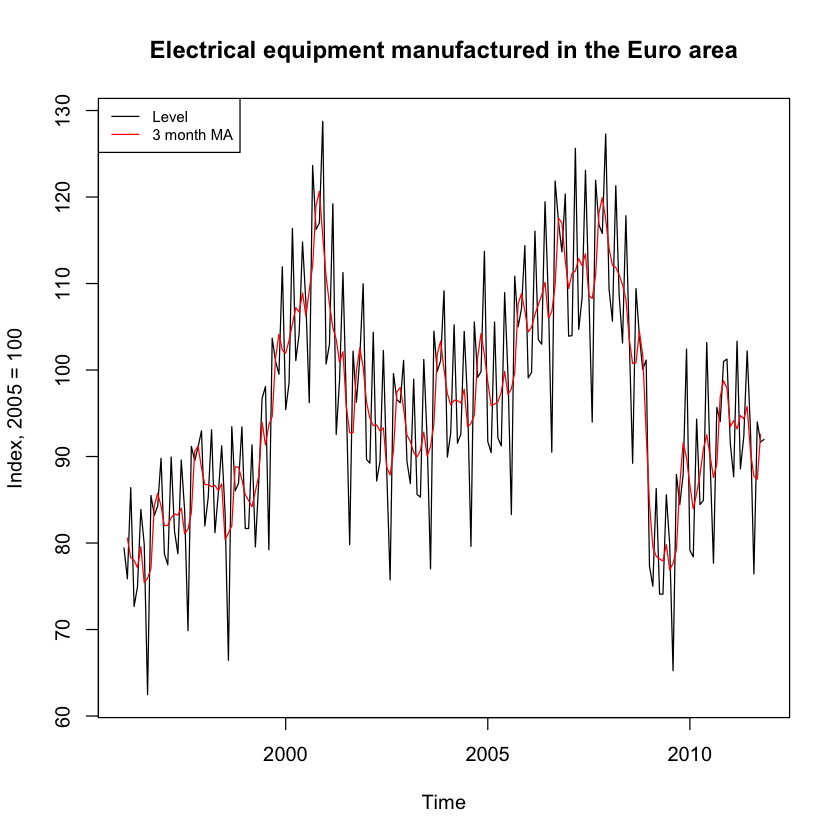

In [7]:
plot(elecequip, main = "Electrical equipment manufactured in the Euro area", ylab = "Index, 2005 = 100")
lines(ma(elecequip, order = 3), col = 'red')
legend("topleft", cex = 0.75,legend=c("Level","3 month MA"), col=c("black", "red"), lty = c(1,1))



It's the Dow Jones again!  Remember we said DJ isn't stationary so we take differences?  Here's how the ARIMA process models them:



In [9]:
djarima <- auto.arima(dj, seasonal = FALSE)
djarima

Series: dj 
ARIMA(0,1,0) with drift         

Coefficients:
       drift
      0.7010
s.e.  1.3188

sigma^2 estimated as 507.9:  log likelihood=-1318.9
AIC=2641.81   AICc=2641.85   BIC=2649.15

In [10]:
diffdjarima<- auto.arima(diff(dj), seasonal = FALSE)
diffdjarima

Series: diff(dj) 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
      intercept
         0.7010
s.e.     1.3188

sigma^2 estimated as 507.9:  log likelihood=-1318.9
AIC=2641.81   AICc=2641.85   BIC=2649.15


What about forecasting? Does this method help with forecasting the Dow?



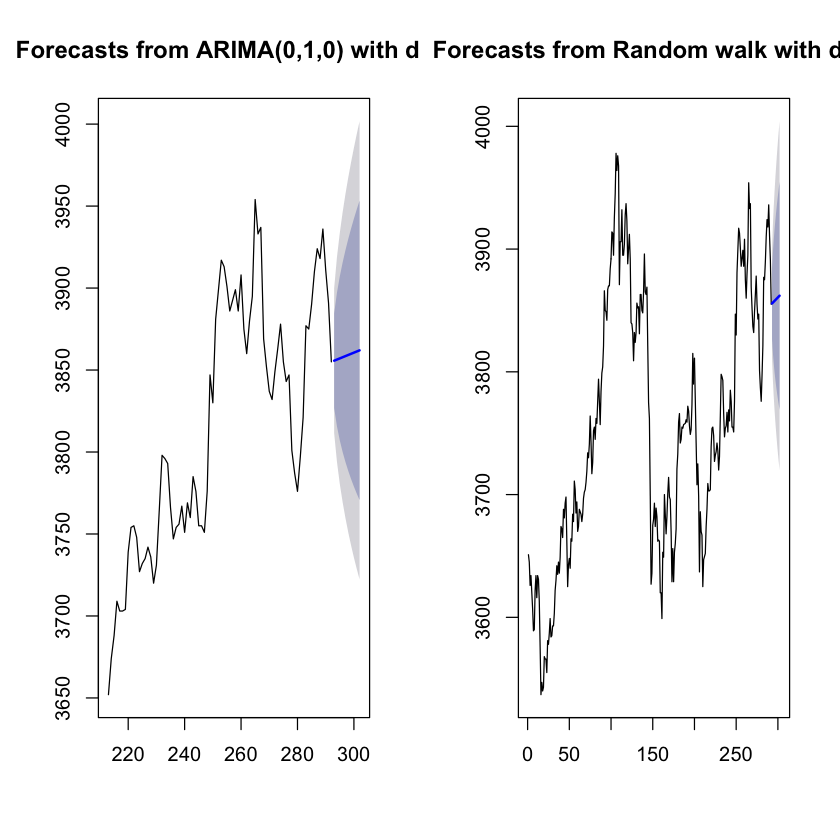

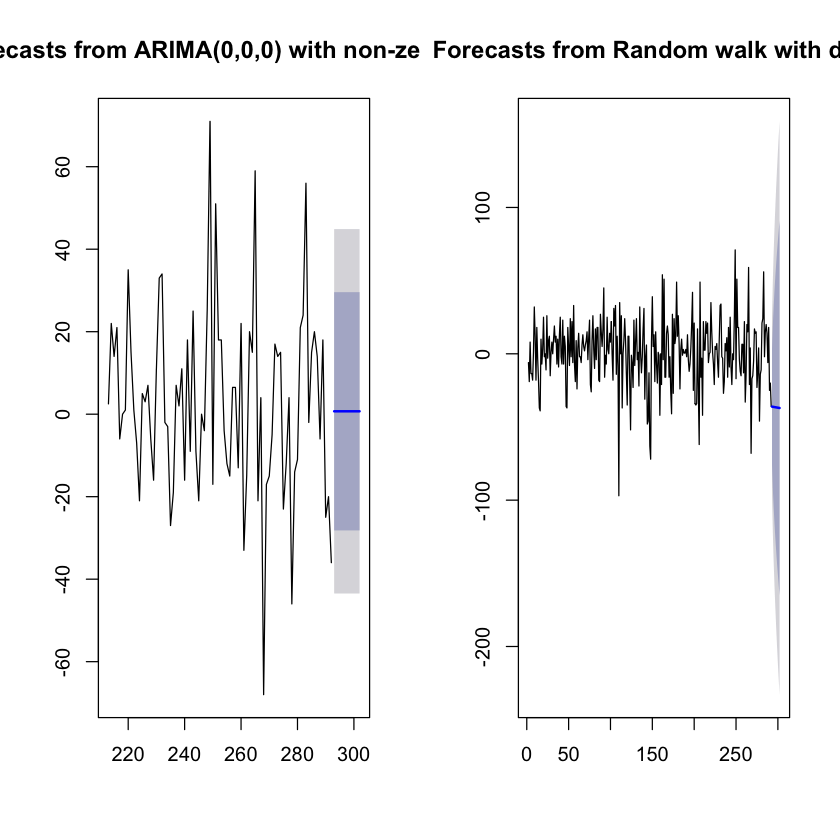

In [11]:
par(mfrow = c(1, 2))

plot(forecast(djarima,h=10),include=80)
plot(rwf(dj, drift = TRUE))


plot(forecast(diffdjarima,h=10),include=80)
plot(rwf(diff(dj), drift = TRUE))


par(mfrow = c(1, 1))



How pictures can help with your auto.arima check



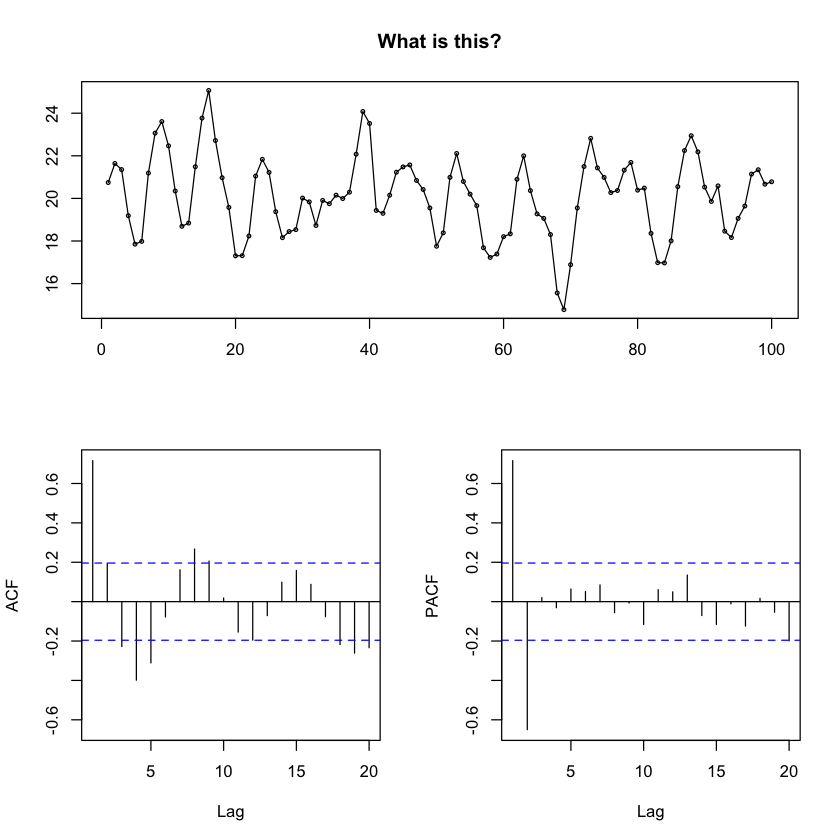

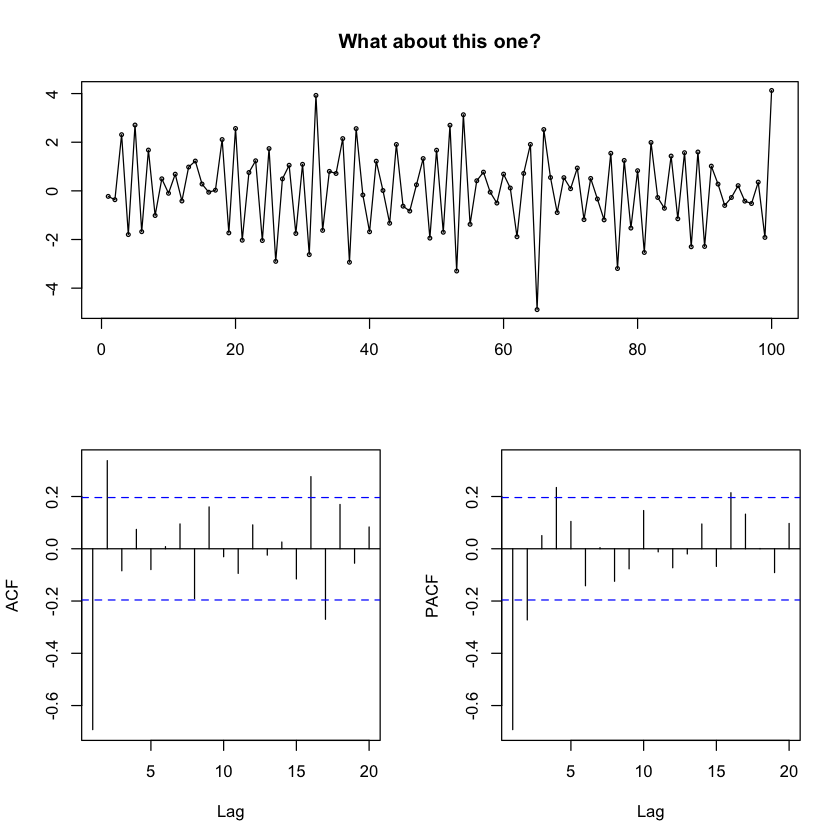

In [12]:
tsdisplay(testAR2, main = "What is this?")


tsdisplay(testMA2, main = "What about this one?")


Example:

Basic EDA:



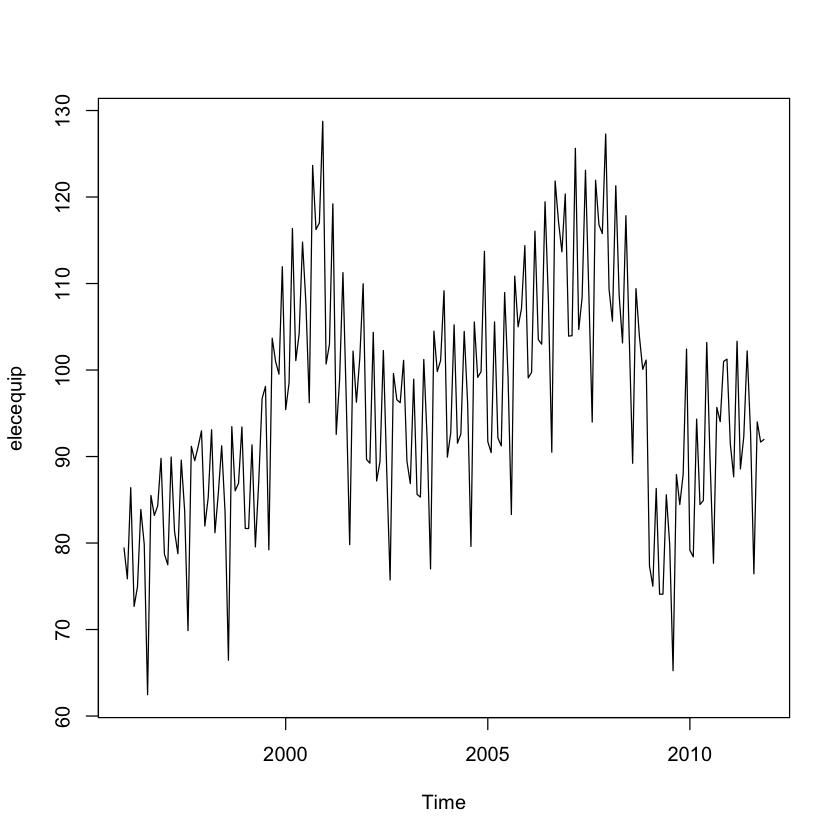

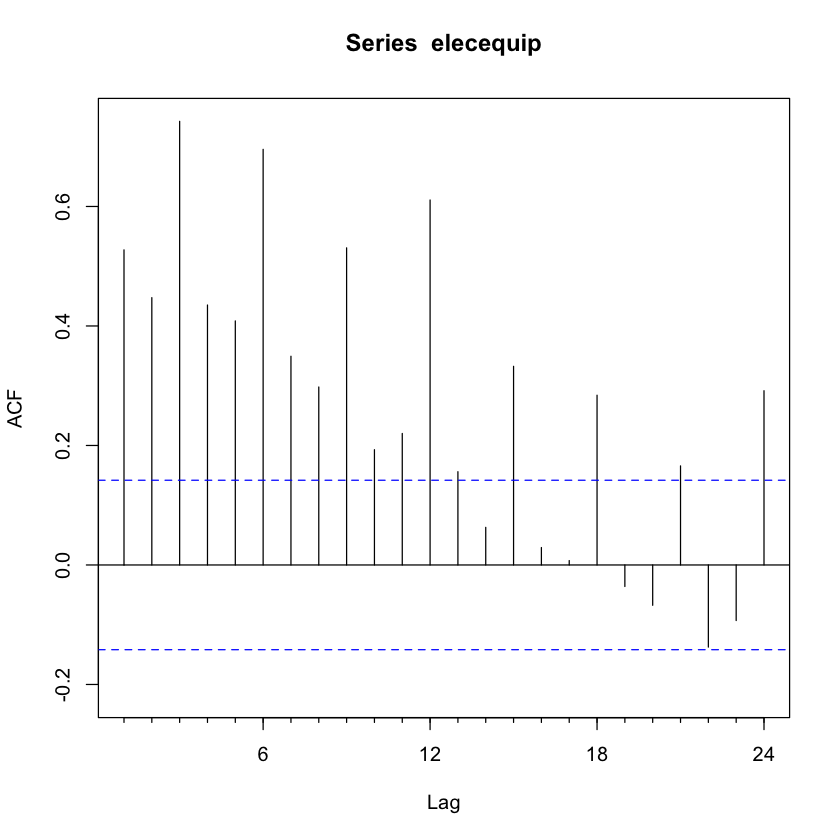

In [13]:
plot(elecequip)
Acf(elecequip)


Hmmmm looks like seasonal adjustment might help:



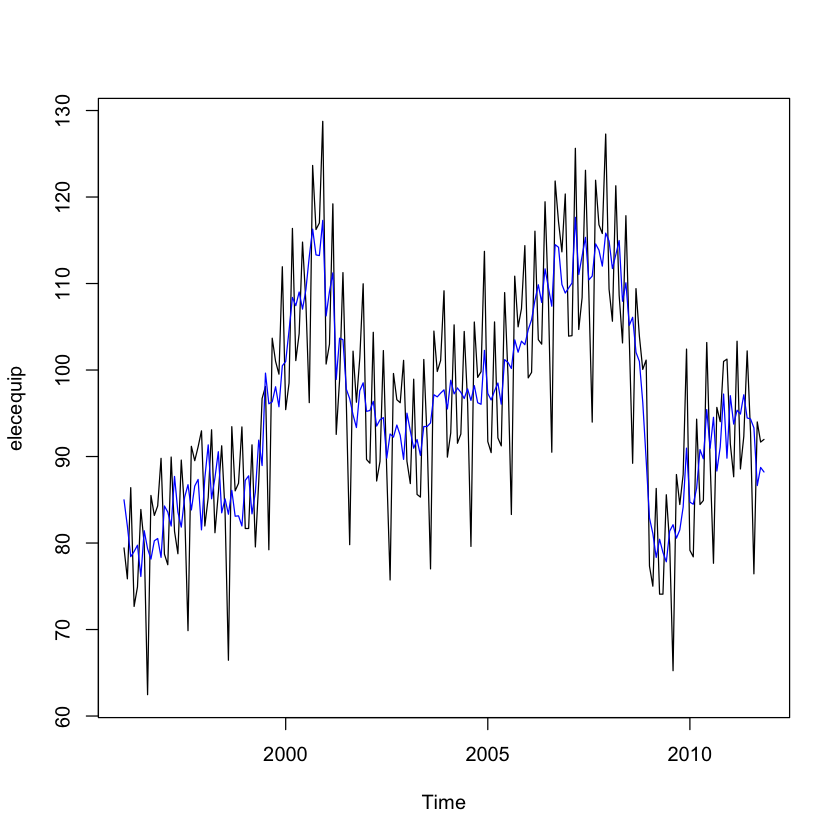

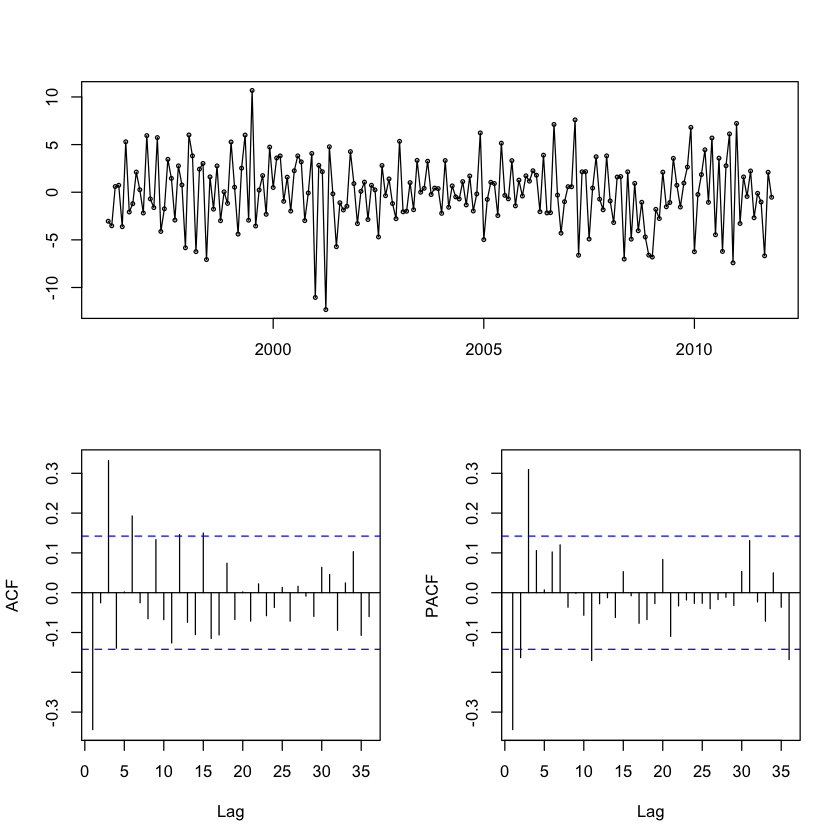

In [14]:
eeadj <- seasadj(stl(elecequip, s.window="periodic"))
plot(elecequip)
lines(eeadj, col = "blue")
tsdisplay(diff(eeadj),main="")



ACF looks like there might be 3 relevant lags.




In [15]:
fit <- Arima(eeadj, order=c(3,0,0))
summary(fit)

Series: eeadj 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3  intercept
      0.5855  0.2280  0.1541    92.4680
s.e.  0.0714  0.0813  0.0718     6.1543

sigma^2 estimated as 10.85:  log likelihood=-497.97
AIC=1005.94   AICc=1006.27   BIC=1022.2

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.1225613 3.259912 2.478955 0.01268966 2.616557 0.3023301
                   ACF1
Training set 0.05379326



Maybe we need an ARIMA model, not an ARMA model



In [16]:
fit <- Arima(eeadj, order=c(3,1,0))
summary(fit)

Series: eeadj 
ARIMA(3,1,0)                    

Coefficients:
          ar1      ar2     ar3
      -0.3488  -0.0386  0.3139
s.e.   0.0690   0.0736  0.0694

sigma^2 estimated as 9.853:  log likelihood=-485.67
AIC=979.33   AICc=979.55   BIC=992.32

Training set error measures:
                     ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.01170679 3.105828 2.430723 -0.04353974 2.560168 0.2964478
                    ACF1
Training set -0.03463506



AICc went down.  What about a MA term?  There's some spikes in the PACF...



In [18]:
fit <- Arima(eeadj, order=c(3,1,3))
summary(fit)

Series: eeadj 
ARIMA(3,1,3)                    

Coefficients:
         ar1     ar2     ar3      ma1     ma2      ma3
      0.0530  0.0488  0.5036  -0.4310  0.0844  -0.1788
s.e.  0.1599  0.1493  0.1290   0.1772  0.1845   0.1714

sigma^2 estimated as 9.786:  log likelihood=-483.54
AIC=981.08   AICc=981.7   BIC=1003.81

Training set error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.0002621479 3.070468 2.393108 -0.04075119 2.519679 0.2918603
                     ACF1
Training set -0.009029354



AICc went up. Wait, the MA term depends on the spikes in the ACF.  Maybe 3 is the wrong number



In [19]:
fit <- Arima(eeadj, order=c(3,1,1))
summary(fit)

Series: eeadj 
ARIMA(3,1,1)                    

Coefficients:
         ar1     ar2     ar3      ma1
      0.0519  0.1191  0.3730  -0.4542
s.e.  0.1840  0.0888  0.0679   0.1993

sigma^2 estimated as 9.737:  log likelihood=-484.08
AIC=978.17   AICc=978.49   BIC=994.4

Training set error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.001227744 3.079373 2.389267 -0.04290849 2.517748 0.2913919
                    ACF1
Training set 0.008928479



What does the auto.arima say?



In [20]:
fit <- auto.arima(eeadj, seasonal = FALSE)
summary(fit)

Series: eeadj 
ARIMA(3,1,1)                    

Coefficients:
         ar1     ar2     ar3      ma1
      0.0519  0.1191  0.3730  -0.4542
s.e.  0.1840  0.0888  0.0679   0.1993

sigma^2 estimated as 9.737:  log likelihood=-484.08
AIC=978.17   AICc=978.49   BIC=994.4

Training set error measures:
                       ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.001227744 3.079373 2.389267 -0.04290849 2.517748 0.2913919
                    ACF1
Training set 0.008928479



Okay, let's go with this one.  How do the residuals look?



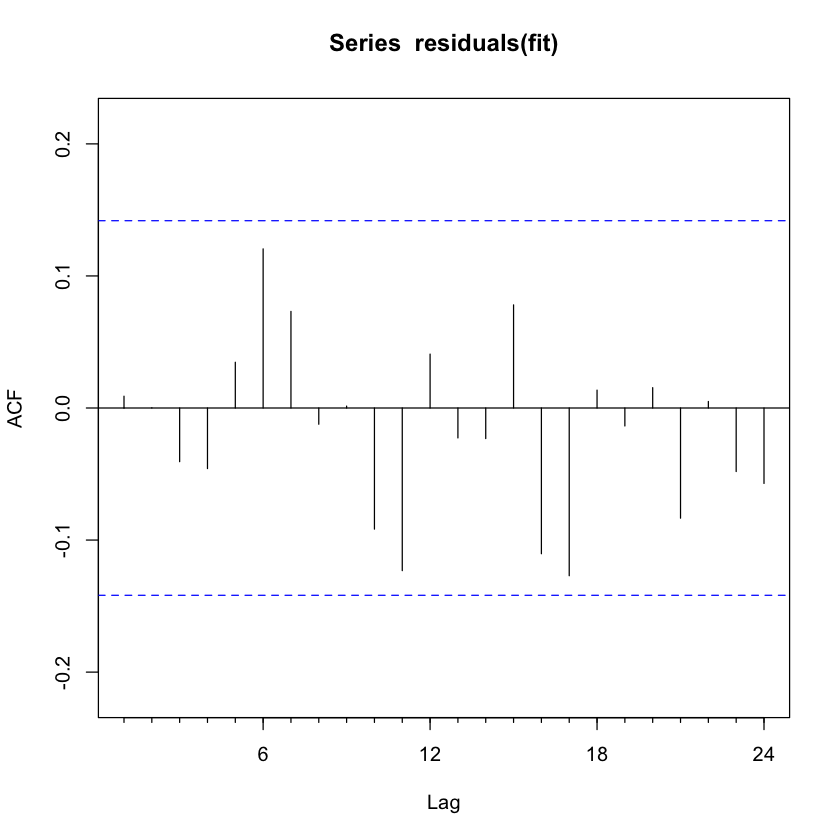

In [21]:
Acf(residuals(fit))


Picture looks good but what about the statistics?



In [22]:
Box.test(residuals(fit), lag=24, fitdf=4, type="Ljung")


	Box-Ljung test

data:  residuals(fit)
X-squared = 20.496, df = 20, p-value = 0.4273


What's with the fitdf = 4?

When testing the residuals of an estimated ARIMA model, the degrees of freedom need to be adjusted to reflect the parameter estimation. For example, for an ARIMA(p,0,q) model, the degrees of freedom should be set to p+q.


And more pictures?



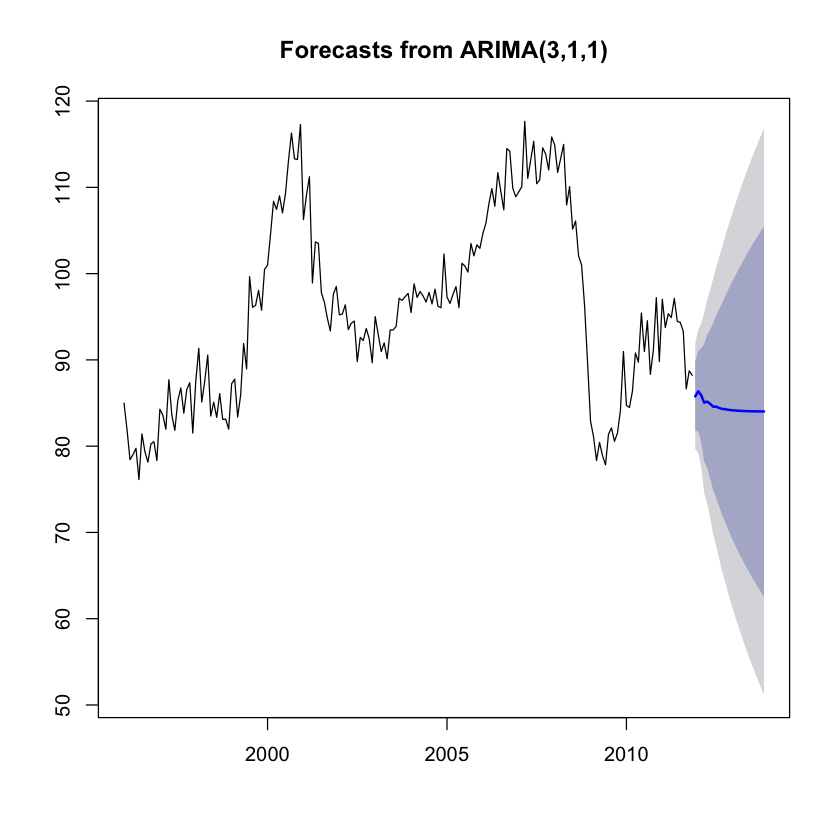

In [23]:
plot(forecast(fit))


Airpassenger seasonal example:



Series: AirPassengers 
ARIMA(0,1,1)(0,1,0)[12]                    

Coefficients:
          ma1
      -0.3184
s.e.   0.0877

sigma^2 estimated as 138.3:  log likelihood=-508.32
AIC=1020.64   AICc=1020.73   BIC=1026.39

Series: AirPassengers 
ARIMA(4,1,2) with drift         

Coefficients:
         ar1     ar2      ar3      ar4      ma1      ma2   drift
      0.2243  0.3689  -0.2567  -0.2391  -0.0971  -0.8519  2.6809
s.e.  0.1047  0.1147   0.0985   0.0919   0.0866   0.0877  0.1711

sigma^2 estimated as 706.3:  log likelihood=-670.07
AIC=1356.15   AICc=1357.22   BIC=1379.85

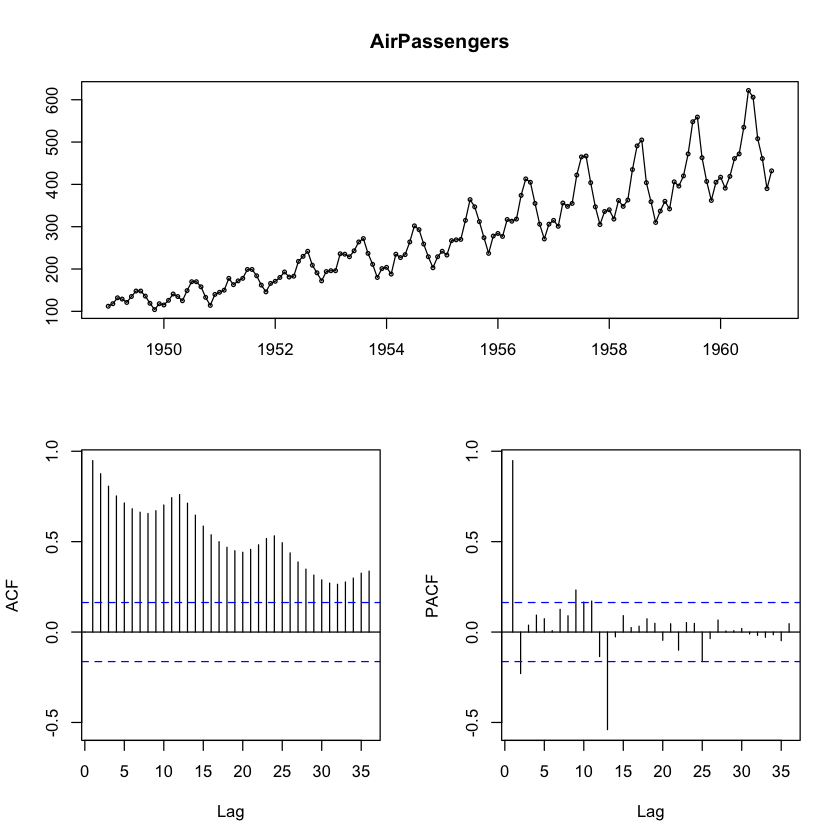

In [24]:
tsdisplay(AirPassengers)

AP <- auto.arima(AirPassengers)
AP
APS <- auto.arima(AirPassengers, seasonal = FALSE)
APS


Wow, that's weird. But the AICc says that the seasonal model fits best.  Let's check out the residuals



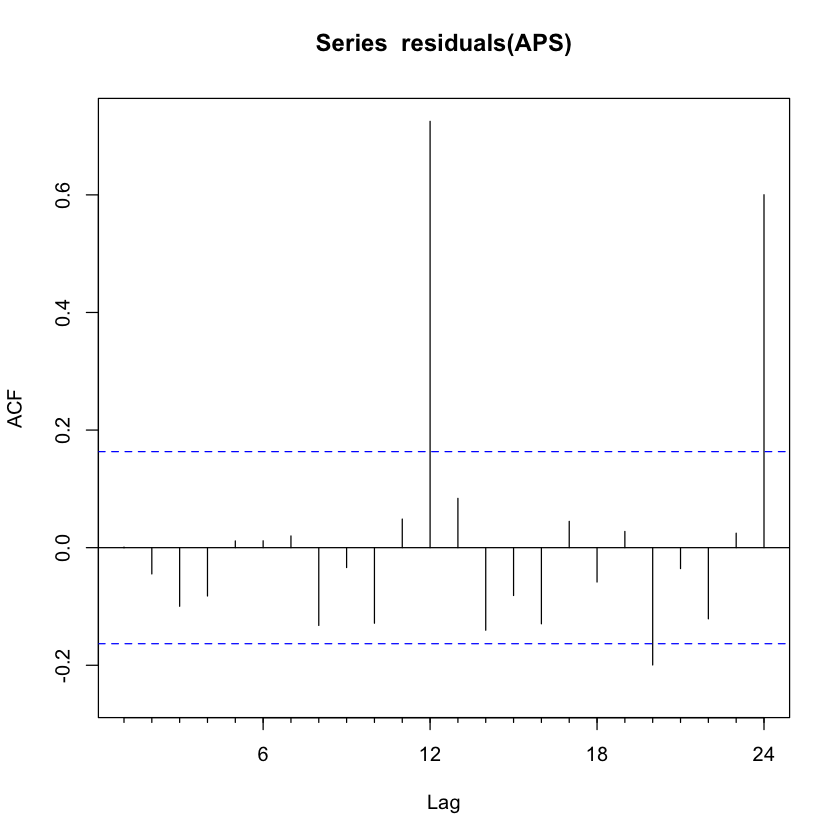

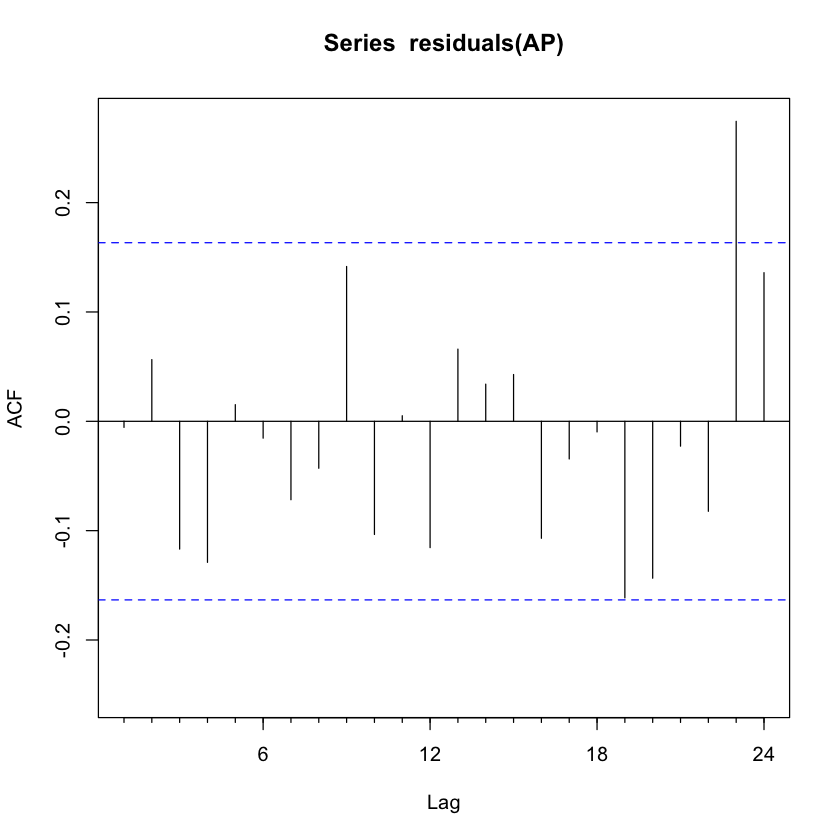

In [25]:

Acf(residuals(APS))

Acf(residuals(AP))



So we forecast:



In [26]:
Box.test(residuals(AP), lag=24, fitdf=0, type="Ljung")



	Box-Ljung test

data:  residuals(AP)
X-squared = 41.807, df = 24, p-value = 0.01356


This says we didn't get it quite right.  Maybe we needed to do more work first.  Seasonally difference the data?  Some other transformation?



More elaborate example from the Fpp book




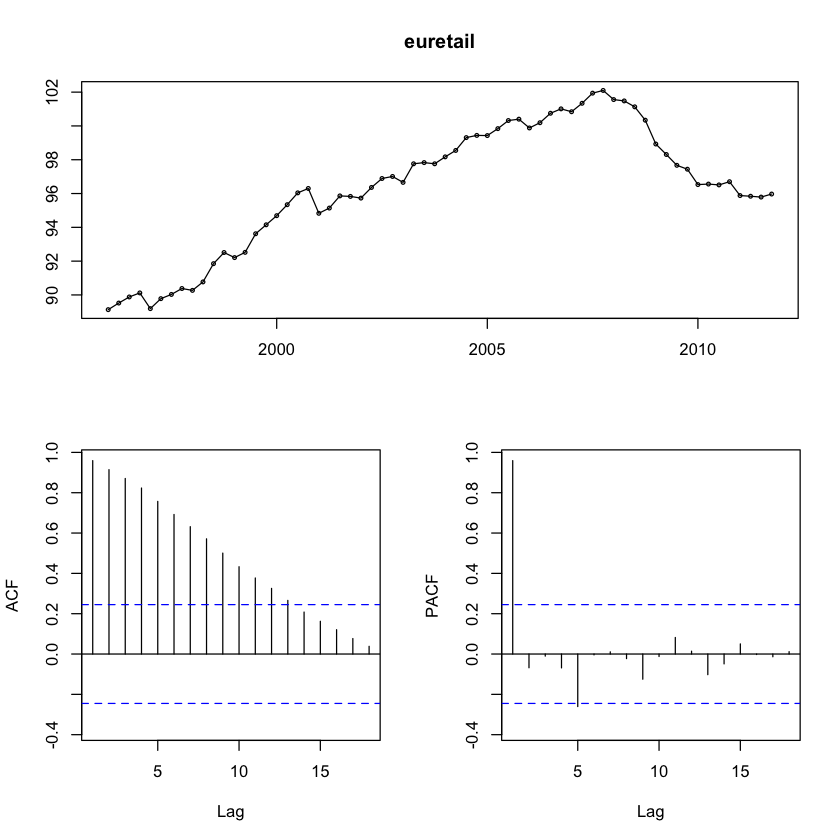

In [27]:
tsdisplay(euretail)


***



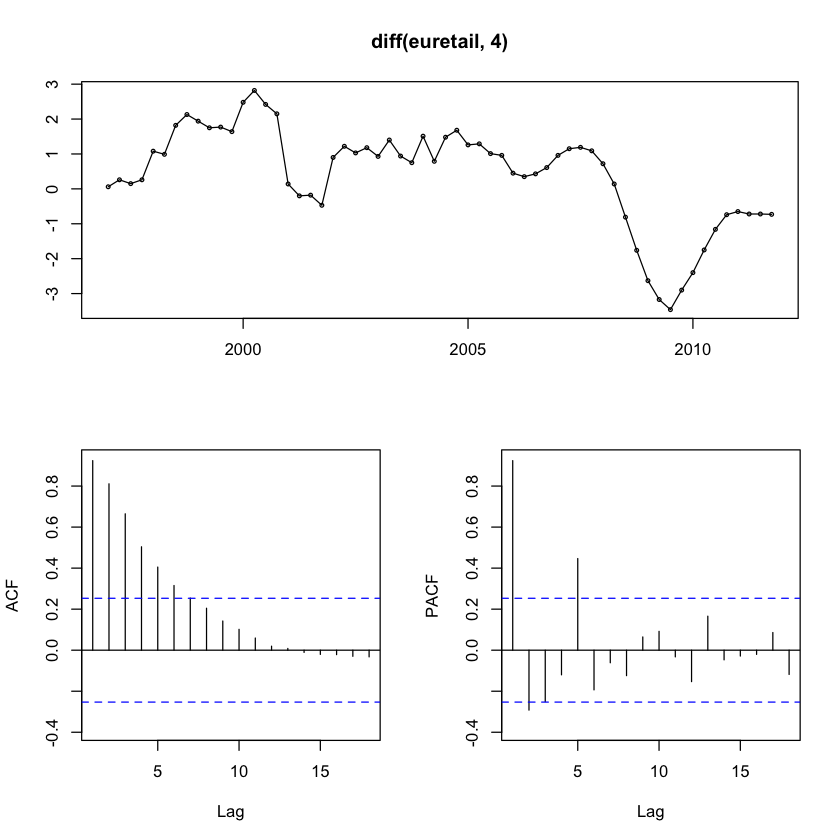

In [28]:
tsdisplay(diff(euretail,4))


***



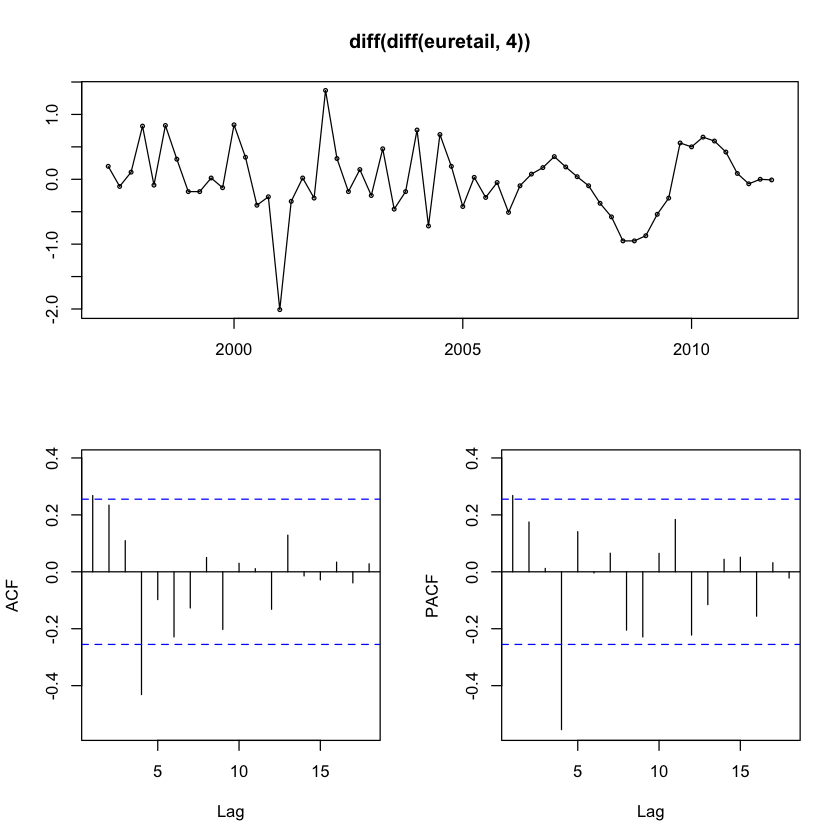

In [29]:
tsdisplay(diff(diff(euretail,4)))


***



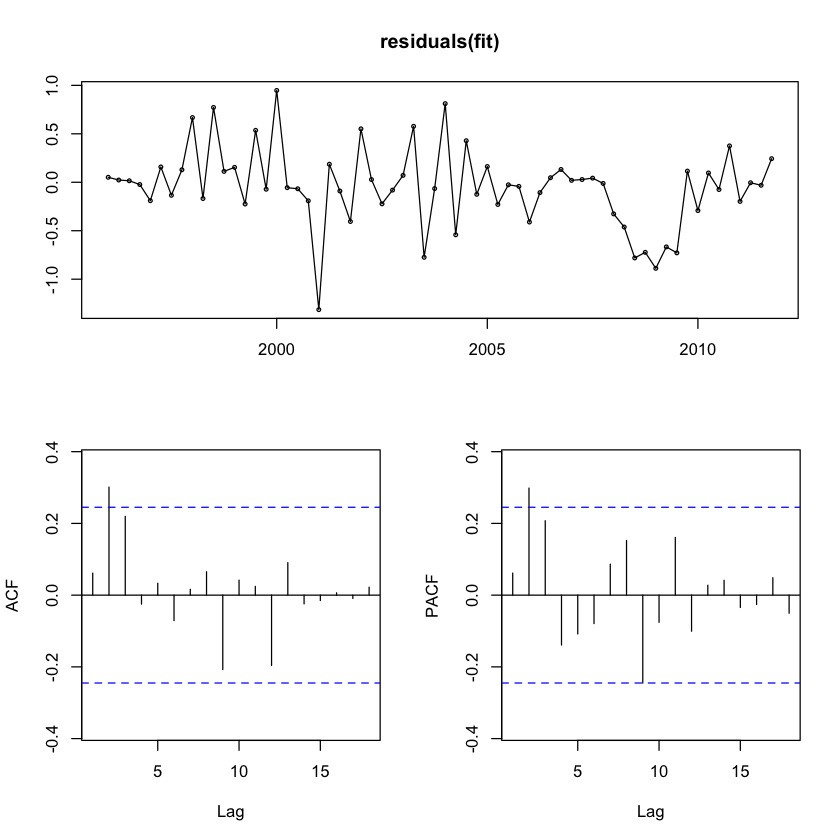

In [30]:
fit <- Arima(euretail, order=c(0,1,1), seasonal=c(0,1,1))
tsdisplay(residuals(fit))


***



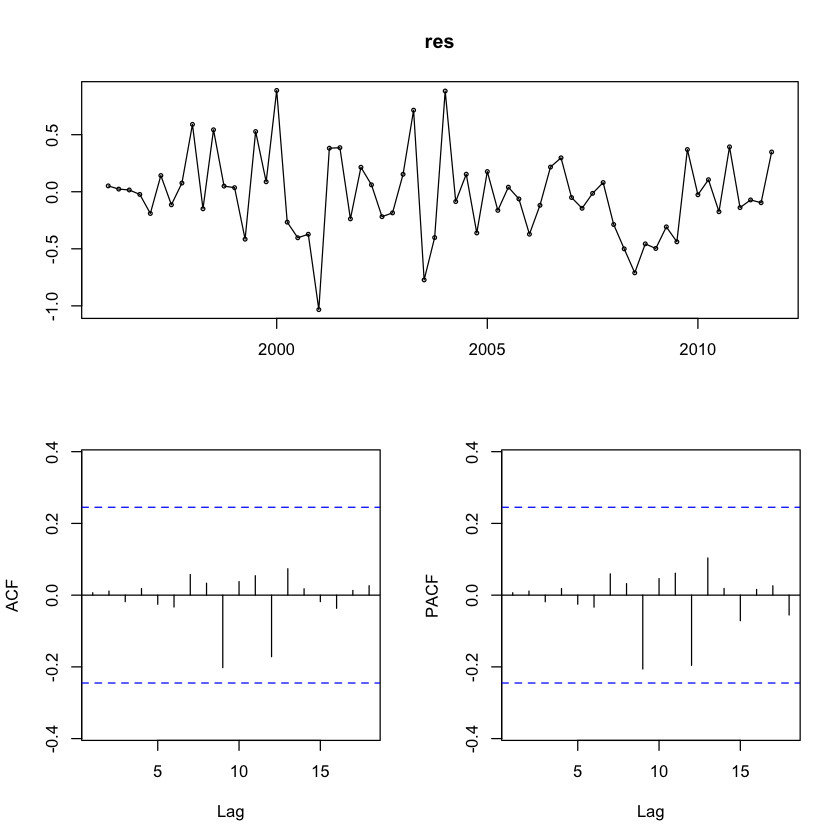

In [31]:
fit3 <- Arima(euretail, order=c(0,1,3), seasonal=c(0,1,1))
res <- residuals(fit3)
tsdisplay(res)


***



In [32]:
Box.test(res, lag=16, fitdf=4, type="Ljung")


	Box-Ljung test

data:  res
X-squared = 7.0105, df = 12, p-value = 0.8569



***



In [33]:
auto.arima(euretail)

Series: euretail 
ARIMA(1,1,2)(0,1,1)[4]                    

Coefficients:
         ar1      ma1     ma2     sma1
      0.7345  -0.4655  0.2162  -0.8413
s.e.  0.2239   0.1995  0.2096   0.1869

sigma^2 estimated as 0.1592:  log likelihood=-29.69
AIC=69.37   AICc=70.51   BIC=79.76


***



In [34]:
auto.arima(euretail, stepwise=FALSE, approximation=FALSE)

Series: euretail 
ARIMA(0,1,3)(0,1,1)[4]                    

Coefficients:
         ma1     ma2     ma3     sma1
      0.2625  0.3697  0.4194  -0.6615
s.e.  0.1239  0.1260  0.1296   0.1555

sigma^2 estimated as 0.1564:  log likelihood=-28.7
AIC=67.4   AICc=68.53   BIC=77.78


***



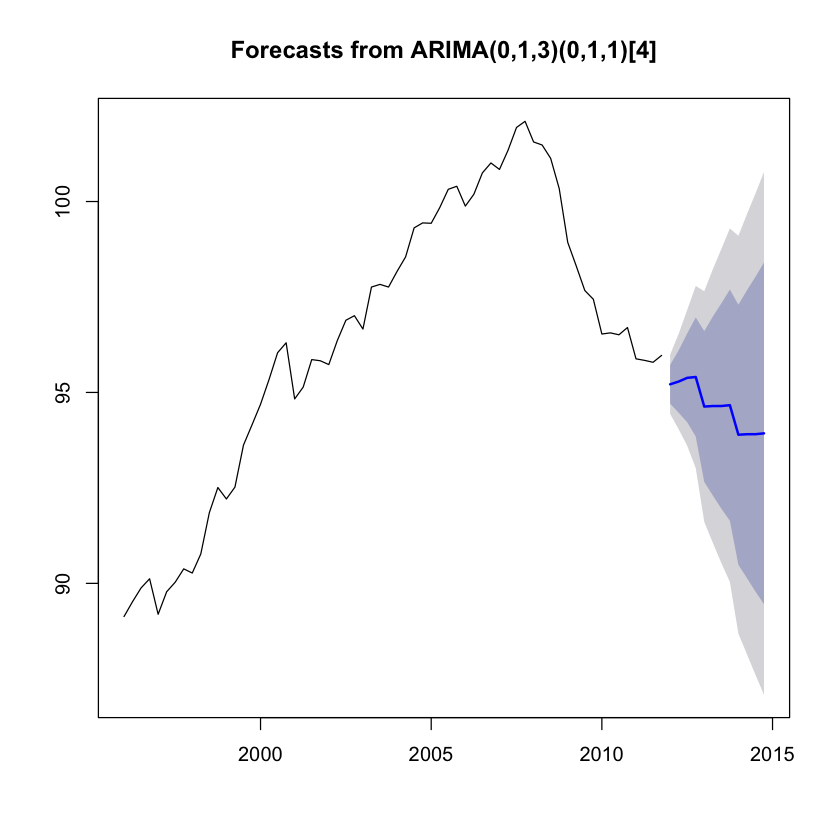

In [35]:
plot(forecast(fit3, h=12))